<a href="https://colab.research.google.com/github/nilaypatel99/Bratss/blob/main/BraTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from psutil import *

In [ ]:
cpu_count()

2

In [ ]:
!lscpu |grep 'Model name'

Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
!df -h / | awk '{print $4}'

Avail
83G


In [ ]:
!free -h --si | awk  '/Mem:/{print $2}'

12G


In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install nibabel


ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3099, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/

In [ ]:
!pip install segmentation-models-3D
!pip install efficientnet-3D
!pip install segmentation-models-3D

In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import segmentation_models_3D as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load sample images and visualize
#Includes, dividing each image by its max to scale them to [0,1]
#Converting mask from float to uint8
#Changing mask pixel values (labels) from 4 to 3 (as the original labels are 0, 1, 2, 4)
#Visualize
###########################################
#View a few images

#Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.






import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

TRAIN_DATASET_PATH='/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(type(test_image_flair),"converted to numpy using nib from nii file")
print(test_image_flair.shape,"size")
print(test_image_flair.max(),"max pixel value")

#so as the max pixel value is around we will rescale it using MinMaxScaler
#Scalers are applied to 1D so let us reshape and then reshape back to original shape.
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max(),"max pixel value")   #maximum value is scaled between 0 to 1


<class 'numpy.memmap'> converted to numpy using nib from nii file
(240, 240, 155) size
1854.603271484375 max pixel value
1.0 max pixel value


Now we load single file images and rescale it to be specific 355 folder flair is already done we rescale t1,t2 and t1ce(t1 weighted)

In [ ]:
  test_image_t1=nib.load(TRAIN_DATASET_PATH+'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
  test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1,test_image_t1.shape[-1])).reshape(test_image_t1.shape) #rescale t1

  test_image_t1ce=nib.load(TRAIN_DATASET_PATH+'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
  test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1,test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape) #rescale t1ce

  test_image_t2=nib.load(TRAIN_DATASET_PATH+'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
  test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1,test_image_t2.shape[-1])).reshape(test_image_t2.shape) #rescale t2

In [ ]:
test_mask=nib.load(TRAIN_DATASET_PATH+'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
print(np.unique(test_mask))          #the values of mask are floating point
test_mask=test_mask.astype(np.uint8) #the values are floating point converted into integer type
print(np.unique(test_mask))          #the values are converted to integer
test_mask[test_mask==4]=3            #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
print(np.unique(test_mask))          #cuz 3 pixel was missing changed from 4 to 3

[0. 1. 2. 4.]
[0 1 2 4]
[0 1 2 3]


Now we be using a random slice using random module and visualize the slice run two,three times to visualize different slice

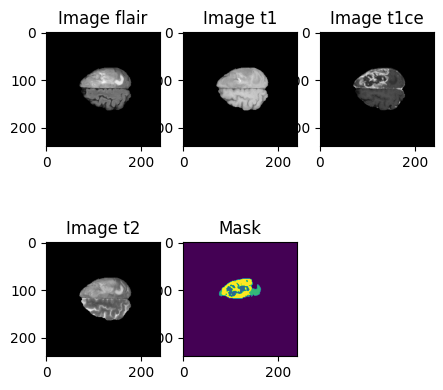

In [ ]:
import random
#random slices are select from image
n_slice=random.randint(0,test_mask.shape[2])    #test_mask.shape[2]=155

plt.figure(figsize=(5, 5))

plt.subplot(231)            #2x3 matrix with 1 pos
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title("Image flair")
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

from below we see there is some label as we can see some mask overlaps

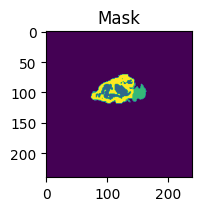

In [ ]:
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

from below we see there is no label as we can't see some mask overlaps(for a particular size this can be a black region of pixel)

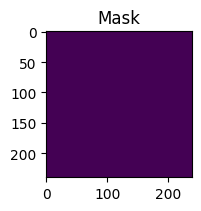

In [ ]:
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

PART 2: Explore the process of combining images to channels and divide them to patches
Includes...
Combining all 4 images to 4 channels of a numpy array.
#
################################################
Flair, T1CE, annd T2 have the most information
Combine t1ce, t2, and flair into single multichannel image for training purpose

In [ ]:
combined_x=np.stack([test_image_flair,test_image_t1ce,test_image_t2],axis=3)
print(combined_x.shape)       #3 represent three images(multichannel 3D volume)
#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
#cropping x, y, and z
#combined_x=combined_x[24:216, 24:216, 13:141]

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4 cuz most of the image part is dark region
print(combined_x.shape)

(240, 240, 155, 3)
(128, 128, 128, 3)


JUST FOR EXPLANATION PURPOSE WE ALSO DO CROPPING TO ALL TEST IMAGE AND SEE THE CHANGE

<ipython-input-81-3153a87f478e>:15: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(test_mask[:,:,n_slice])
<ipython-input-81-3153a87f478e>:15: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(test_mask[:,:,n_slice])


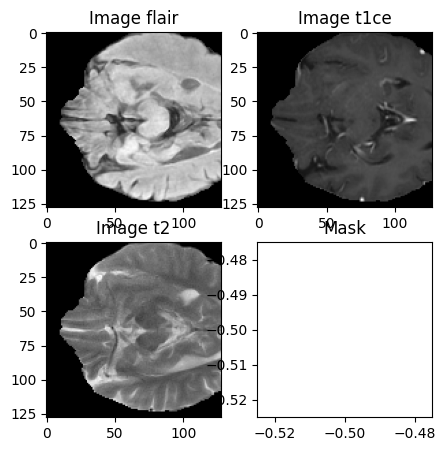

In [ ]:
test_mask=test_mask[56:184, 56:184, 13:141]
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(5, 5))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

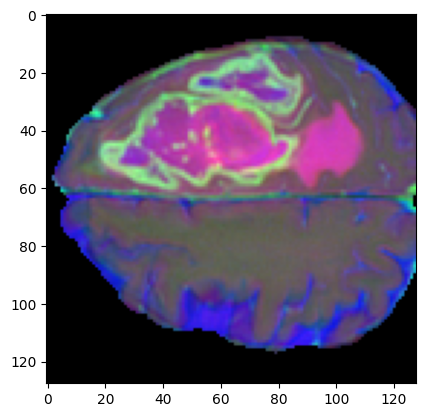

In [ ]:
# imsave(TRAIN_DATASET_PATH+'BraTS20_Training_355/combined355.tif', combined_x)
# np.save(TRAIN_DATASET_PATH+'BraTS20_Training_355/combined355.npy', combined_x)
#Verify image is being read properly
# my_img=imread(TRAIN_DATASET_PATH+'BraTS20_Training_355/combined355.tif')

my_img=np.load(TRAIN_DATASET_PATH+'BraTS20_Training_355/combined355.npy')
plt.imshow(my_img[:,:,n_slice])

In [ ]:
# print(my_img[:,:,n_slice])
# print(combined_x==my_img.all()) #this just shows if both are same images

In [ ]:
print(test_mask.shape)
test_mask=to_categorical(test_mask,num_classes=4)
print(test_mask.shape)     #changed to_categorical

(128, 128, 128)
(128, 128, 128, 4)


#Now let us apply the same as above to all the images...
Merge channels, crop, patchify, save
GET DATA READY =  GENERATORS OR OTHERWISE

Keras datagenerator does ntot support 3d


In [ ]:
t2_list = sorted(glob.glob('/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [ ]:
print(t2_list)     #list of all images of t2 from each folder stored in list for easy analysis
len(t2_list)

['/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_004/BraTS20_Training_004_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_005/BraTS20_Training_005_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_006/BraTS20_Training_006_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_007/BraTS20_Training_007_t2.nii', '/content/drive/MyDrive/archive/BraTS2020_Train

369

In [ ]:
for img in range(len(t2_list)):
  # print('Now preparing images and mask number',img)

  temp_image_t2=nib.load(t2_list[img]).get_fdata()
  temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

  temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
  temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

  temp_image_flair=nib.load(flair_list[img]).get_fdata()
  temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

  temp_mask=nib.load(mask_list[img]).get_fdata()
  temp_mask=temp_mask.astype(np.uint8)
  temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))


  temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
    #cropping x, y, and z
  temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
  temp_mask = temp_mask[56:184, 56:184, 13:141]

  val,counts=np.unique(temp_mask,return_counts=True)  #this will return [0,1,2,3] how many times they appear

  if(1-(counts[0]/counts.sum()))>0.01:  #At least 1% useful volume with labels that are not 0
    print("Save me")
    temp_mask=to_categorical(temp_mask,num_classes=4)
    np.save('/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
    np.save('/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
  else:
    print("I am useless")

#For Explanation purposes **don't run** every time

In [ ]:
# for img in range(1,10):
#   # print('Now preparing images and mask number',img)

#   temp_image_t2=nib.load(t2_list[img]).get_fdata()
#   temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

#   temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
#   temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

#   temp_image_flair=nib.load(flair_list[img]).get_fdata()
#   temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

#   temp_mask=nib.load(mask_list[img]).get_fdata()
#   temp_mask=temp_mask.astype(np.uint8)
#   temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
#     #print(np.unique(temp_mask))


#   temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

#     #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
#     #cropping x, y, and z
#   temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
#   temp_mask = temp_mask[56:184, 56:184, 13:141]

#   val,counts=np.unique(temp_mask,return_counts=True)  #this will return [0,1,2,3] how many times they appear
#   print(val,counts)

#   if(1-(counts[0]/counts.sum()))>0.01:  #At least 1% useful volume with labels that are not 0
#     print(counts[0],counts.sum())
#     print(counts[0]/counts.sum(),"Save me")
#     temp_mask=to_categorical(temp_mask,num_classes=4)
#     np.save('/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_4channels/images/image_'+str(img)+'.npy', temp_combined_images)
#     np.save('/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_4channels/masks/mask_'+str(img)+'.npy', temp_mask)
#   else:
#     print("I am useless")

"""
Code for splitting folder into train, test, and val.
Once the new folders are created rename them and arrange in the format below to be used
for semantic segmentation using data generators.

pip install split-folders
"""

In [ ]:
# # from splitfolders.split import group_by_prefix
# import splitfolders

# input_folder="/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_3channels/"
# output_folder="/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/"

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Custom data generator to work with BraTS2020 dataset.
Can be used as a template to create your own custom data generators.

No image processing operations are performed here, just load data from local directory
in batches.

"""


In [ ]:
import os
#load images function
def load_img(img_dir,img_list):
  images=[]
  for i,image_name in enumerate(img_list):   #this will provide the index and file_name
    if(image_name.split('.')[1]=='npy'):
      image=np.load(img_dir+image_name)       #load the image from the directory and folder
      images.append(image)

  images=np.array(images)                   #converts into numpy array

  return (images)

def imageLoader(img_dir,img_list,mask_dir,mask_list,batch_size):
  L=len(img_list)

#keras needs the generator infinite, so we will use while true
  while True:
    batch_start=0
    batch_end=batch_size

    while batch_start<L:      #here it will return in terms of batches let's say 16 is the batch size
      limit=min(batch_end,L)   #(16,258)

      X=load_img(img_dir,img_list[batch_start:limit])   #[0:16],[16,32],....
      Y=load_img(mask_dir,mask_list[batch_start:limit])  #ll'y for this too

      yield(X,Y)   #a tuple with two numpy arrays with batch_size samples this returns different individual batches of 16 each time
      batch_start+=batch_size
      batch_end+=batch_size

In [ ]:
##Test the generator
import os
train_img_dir="/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir="/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list=os.listdir(train_mask_dir)

batch_size=2

train_img_datagen=imageLoader(train_img_dir,train_img_list,train_mask_dir,train_mask_list,batch_size)

    #Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()    #o/ps:(2,128,128,128,3) and (2,128,128,128,4) 3 and 4 represents channels and categorical changes
    #2 is batch size

    #sanity check
img_num=random.randint(0,img.shape[0]-1)  #randomly select the image number
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask,axis=3)    #argmax to convert from categorical to integer for plotting purpose

n_slice=random.randint(0,test_mask.shape[2])  #randomy select the slice in each of this images

plt.figure(figsize=(5, 5))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
"""

Converted my standard 2D Unet to 3D.

"""

from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want


################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()

    return model

#Test if everything is working ok.
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

In [ ]:
"""
Code to train batches of cropped BraTS 2020 images using 3D U-net.

Please get the data ready and define custom data gnerator using the other
files in this directory.

Images are expected to be 128x128x128x3 npy data (3 corresponds to the 3 channels for
                                                  test_image_flair, test_image_t1ce, test_image_t2)
Change the U-net input shape based on your input dataset shape (e.g. if you decide to only se 2 channels or all 4 channels)

Masks are expected to be 128x128x128x4 npy data (4 corresponds to the 4 classes / labels)


You can change input image sizes to customize for your computing resources.
"""


import os
import numpy as np
# from custom_datagen import imageLoader
#import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



####################################################
train_img_dir = "/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

#############################################################
#Optional step of finding the distribution of each class and calculating appropriate weights
#Alternatively you can just assign equal weights and see how well the model performs: 0.25, 0.25, 0.25, 0.25

import pandas as pd
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('BraTS2020_TrainingData/input_data_128/train/masks/*.npy'))
for img in range(len(train_mask_list)):
    print(img)
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)

    df = df.append(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4
#Class weights claculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

#Weights are: 0.26, 22.53, 22.53, 26.21
#wt0, wt1, wt2, wt3 = 0.26, 22.53, 22.53, 26.21
#These weihts can be used for Dice loss


In [ ]:
##############################################################
#Define the image generators for training and validation

train_img_dir = "/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/train/masks/"

val_img_dir = "/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/val/images/"
val_mask_dir = "/content/drive/MyDrive/archive/BraTS2020_TrainingData/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)
##################################

########################################################################
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
###########################################################################
#Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)
#######################################################################
#Fit the model

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

#we are using simple_unet from 3d unit model
model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=128,
                          IMG_CHANNELS=3,
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

In [ ]:
history=model.fit(train_img_datagen,steps_per_epoch=steps_per_epoch,epochs=100,verbose=1,validation_data=val_img_datagen,validation_steps=val_steps_per_epoch)

model.save('brats_3d.hdf5')

In [ ]:

##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################
from keras.models import load_model

#Load model for prediction or continue training

#For continuing training....
#The following gives an error: Unknown loss function: dice_loss_plus_1focal_loss
#This is because the model does not save loss function and metrics. So to compile and
#continue training we need to provide these as custom_objects.
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5')

#So let us add the loss as custom object... but the following throws another error...
#Unknown metric function: iou_score
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5',
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss})

#Now, let us add the iou_score function we used during our initial training
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5',
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

#Now all set to continue the training process.
history2=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=1,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )
#################################################

#For predictions you do not need to compile the model, so ...
my_model = load_model('saved_models/brats_3d_100epochs_simple_unet_weighted_dice.hdf5',
                      compile=False)


#Verify IoU on a batch of images from the test dataset
#Using built in keras function for IoU
#Only works on TF > 2.0
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

#############################################
#Predict on a few test images, one at a time
#Try images:
img_num = 82

test_img = np.load("BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

############################################################
